# Coronavirus disease (COVID-19) Pandemic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots
from pathlib import Path
import os


In [ ]:
df = pd.read_csv("/corona-virus-report/covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

## 1. Details about the columns:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
Province/State    14664 non-null object
Country/Region    49068 non-null object
Lat               49068 non-null float64
Long              49068 non-null float64
Date              49068 non-null datetime64[ns]
Confirmed         49068 non-null int64
Deaths            49068 non-null int64
Recovered         49068 non-null int64
Active            49068 non-null int64
WHO Region        49068 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
df.describe(include = 'object')

Province/State Country/Region WHO Region
count           14664          49068      49068
unique             78            187          6
top           Beijing          China     Europe
freq              188           6204      15040

In [ ]:
a = df.Date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-22 00:00:00
The last date is: 2020-07-27 00:00:00


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
#Renaming the coulmns for easy usage
df.rename(columns={'Date': 'date',
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# Active Case = confirmed - deaths - recovered
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

# 2. Visualization using Plotly:

## A. Worldwide spread analysis:

In [ ]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%m/%d/%Y')
df1 = df1.fillna('-')
fig = px.density_mapbox(df1, lat='lat', lon='long', z='confirmed', radius=20,zoom=1, hover_data=["country",'state',"confirmed"],
                        mapbox_style="carto-positron", animation_frame = 'date', range_color= [0, 10000],title='Spread of Covid-19')
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

## B. Active cases around the world:

In [ ]:
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

country  confirmed  active  deaths
0  Afghanistan      36263    9796    1269
1      Albania       4880    1991     144
2      Algeria      27973    7973    1163
3      Andorra        907      52      52
4       Angola        950     667      41

In [ ]:
figure = px.choropleth(world, locations="country",
                    locationmode='country names', color="active",
                    hover_name="country", range_color=[1,500000],
                    color_continuous_scale="Peach",
                    title='Countries with Active Cases')
figure.show()

## C. Recovered count around the world:

In [ ]:
fig = px.scatter_mapbox(top, lat="lat", lon="long", hover_name="country", hover_data=["country","recovered"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Recovered count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

## D. Death count around the world:

In [ ]:
world['size'] = world['deaths'].pow(0.2)
fig = px.scatter_geo(world, locations="country",locationmode='country names', color="deaths",
                     hover_name="country", size="size",hover_data = ['country','deaths'],
                     projection="natural earth",title='Death count of each country')
fig.show()

# 3. Visualization using Seaborn:

## A. Confirmed Cases Over Time

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Weeks')]

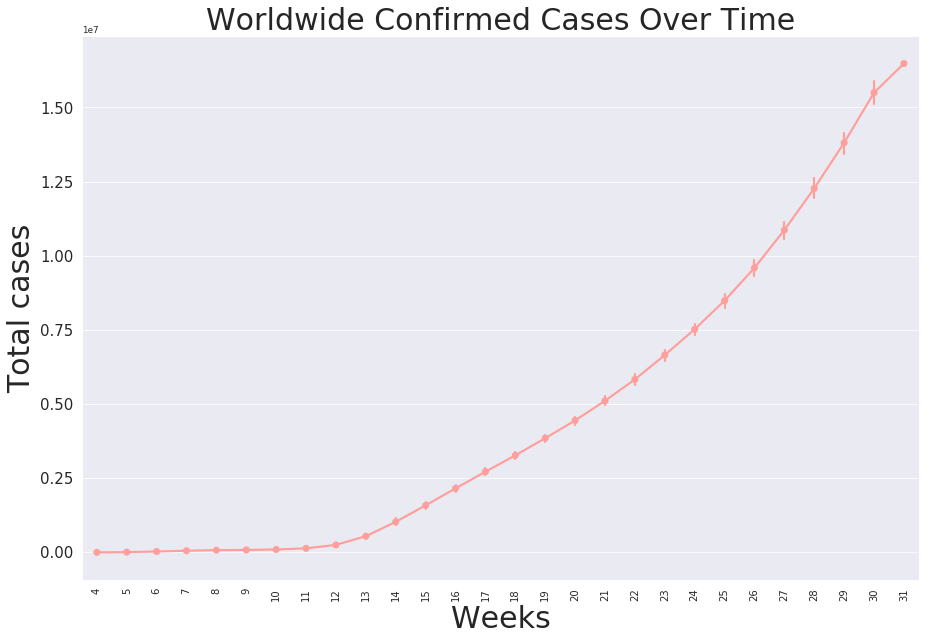

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total cases',fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.week ,y = total_cases.confirmed , color = 'r')
ax.set(xlabel='Weeks', ylabel='Total cases')

## B. Top 20 countries having most confirmed cases

In [ ]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

country  confirmed
0               US    4290259
1           Brazil    2442375
2            India    1480073
3           Russia     816680
4     South Africa     452529
5           Mexico     395489
6             Peru     389717
7            Chile     347923
8   United Kingdom     301708
9             Iran     293606
10        Pakistan     274289
11           Spain     272421
12    Saudi Arabia     268934
13        Colombia     257101
14           Italy     246286
15          Turkey     227019
16      Bangladesh     226225
17          France     220352
18         Germany     207112
19       Argentina     167416

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

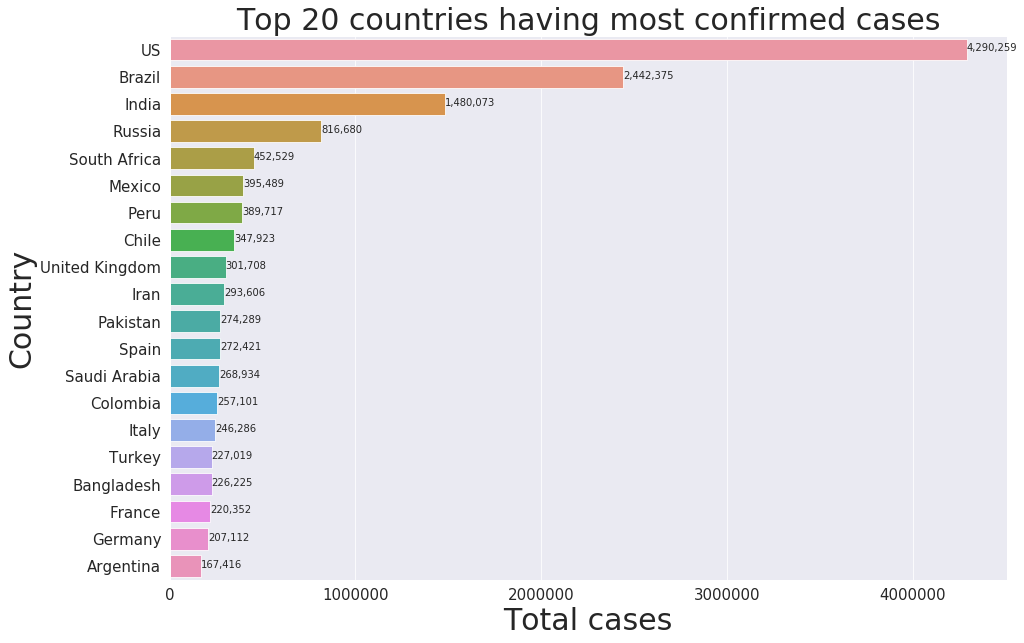

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.confirmed, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.confirmed,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

## C. Top 20 countries having most active cases

In [ ]:
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

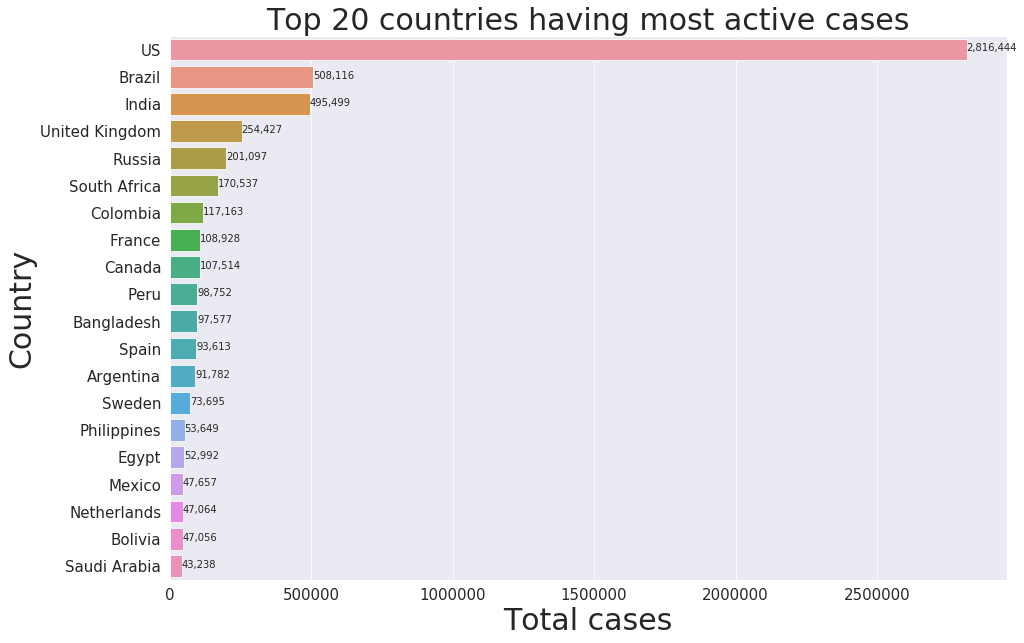

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

## D. Top 20 countries having most deaths

In [ ]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

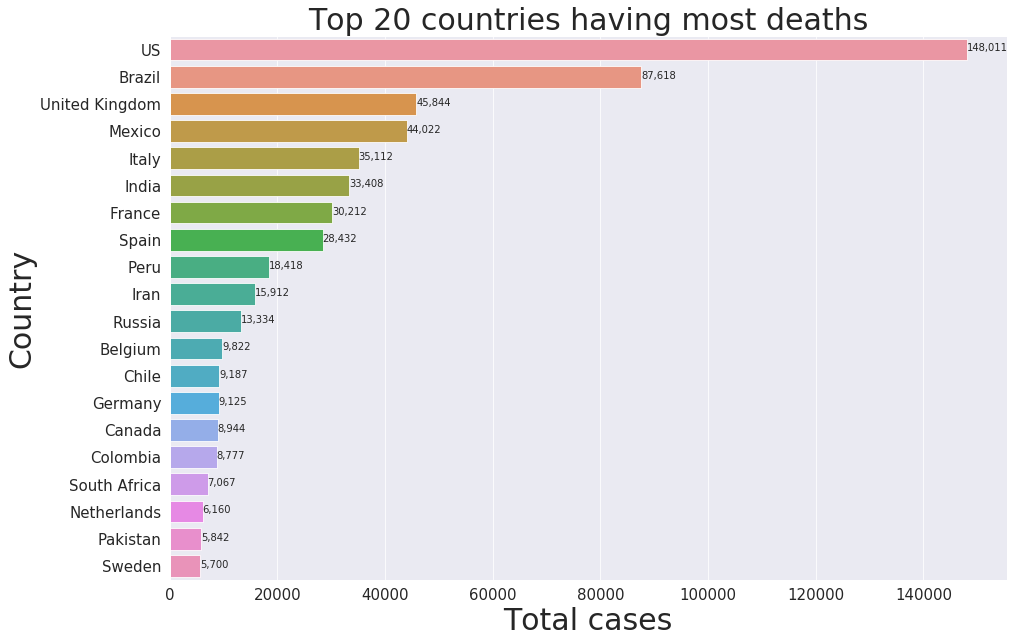

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

## E. Top 20 countries having most recovered cases

In [ ]:
top_recovered = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

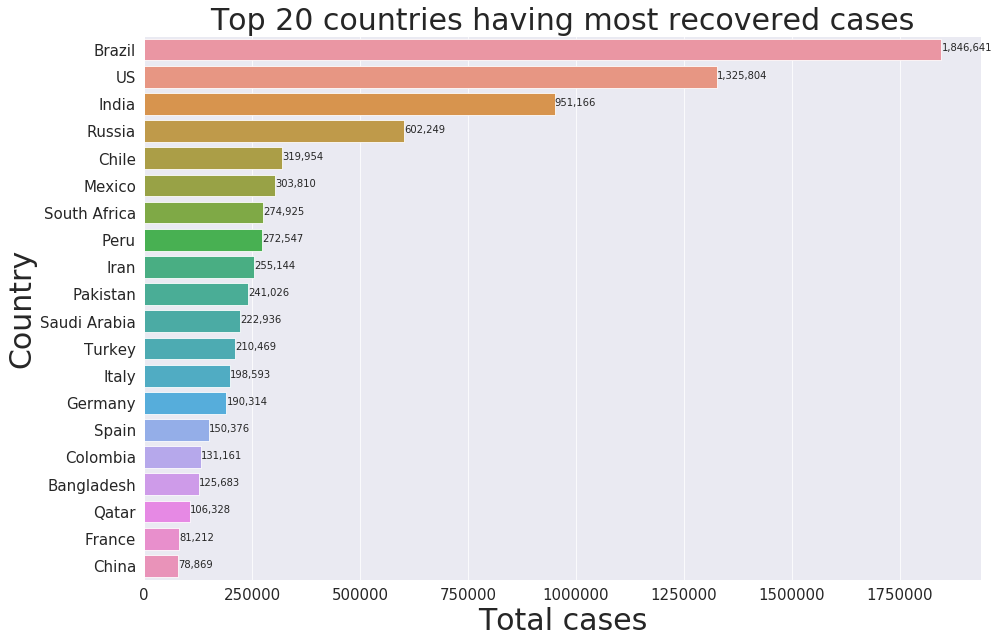

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

## F. Top 20 countries having the worst mortality and best recovery rate:

In [ ]:
rate = top.groupby(by = 'country')['recovered','confirmed','deaths'].sum().reset_index()
rate['recovery percentage'] =  round(((rate['recovered']) / (rate['confirmed'])) * 100 , 2)
rate['death percentage'] =  round(((rate['deaths']) / (rate['confirmed'])) * 100 , 2)
rate.head()

country  recovered  confirmed  deaths  recovery percentage  \
0  Afghanistan      25198      36263    1269                69.49   
1      Albania       2745       4880     144                56.25   
2      Algeria      18837      27973    1163                67.34   
3      Andorra        803        907      52                88.53   
4       Angola        242        950      41                25.47   

   death percentage  
0              3.50  
1              2.95  
2              4.16  
3              5.73  
4              4.32

In [ ]:
mortality = rate.groupby(by = 'country')['death percentage'].sum().sort_values(ascending = False).head(20).reset_index()
mortality

country  death percentage
0            Yemen             28.56
1   United Kingdom             15.19
2          Belgium             14.79
3            Italy             14.26
4           France             13.71
5          Hungary             13.40
6      Netherlands             11.53
7           Mexico             11.13
8            Spain             10.44
9   Western Sahara             10.00
10            Chad              8.13
11          Canada              7.68
12          Sweden              7.18
13         Ecuador              6.82
14         Ireland              6.81
15        Barbados              6.36
16           Sudan              6.30
17         Liberia              6.17
18           Niger              6.10
19      San Marino              6.01

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Mortality Rate in percentage')]

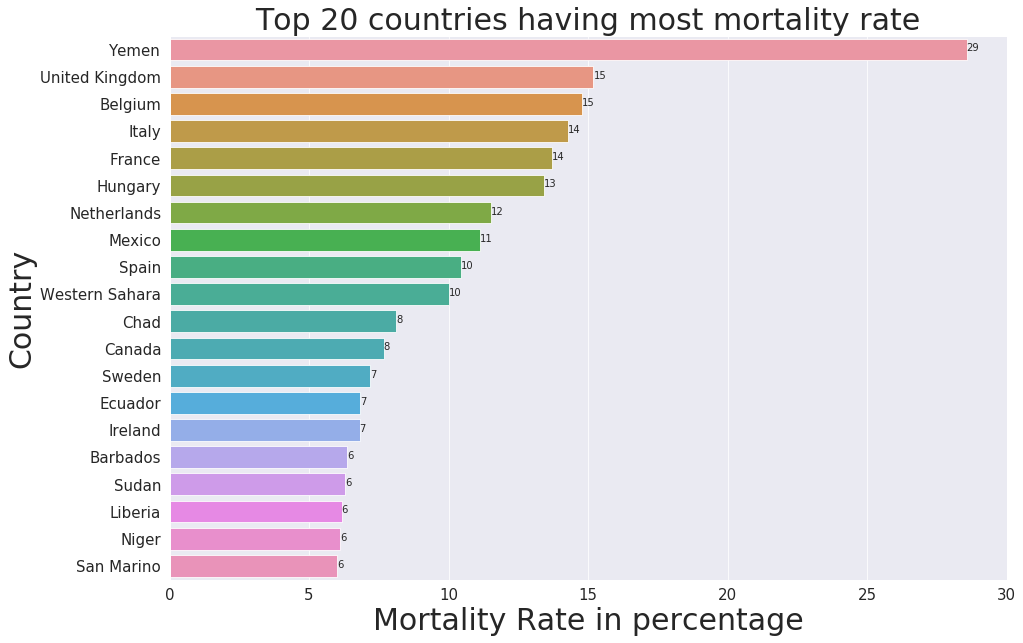

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')

In [ ]:
recovery = rate.groupby(by = 'country')['recovery percentage'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

country  recovery percentage
0        Dominica               100.00
1        Holy See               100.00
2         Grenada               100.00
3        Djibouti                98.38
4         Iceland                98.33
5          Brunei                97.87
6     New Zealand                97.24
7           Qatar                97.02
8        Malaysia                96.60
9       Mauritius                96.51
10         Norway                95.84
11        Taiwan*                95.24
12           Laos                95.00
13          Malta                94.86
14        Estonia                94.54
15       Thailand                94.36
16  Liechtenstein                94.19
17     San Marino                93.99
18        Finland                93.54
19      Greenland                92.86

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Recovery Rate in percentage')]

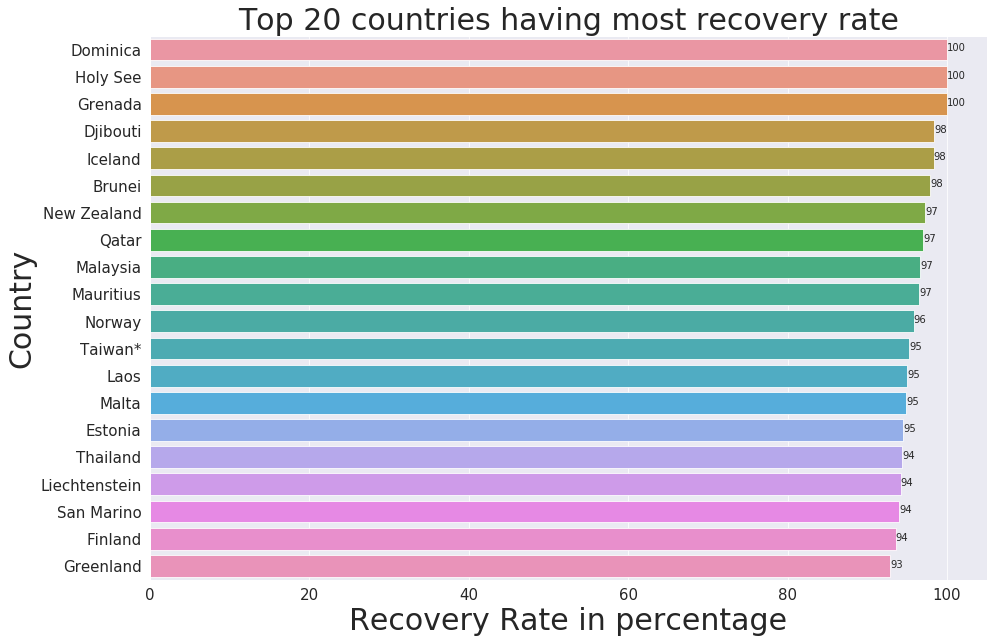

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovery rate" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Recovery Rate in percentage', ylabel='Country')

# 3. Analysis of most affected countries

In [ ]:
china =  df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china['date'] = china['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
china.head()

date  recovered  deaths  confirmed  active
0 2020-01-22         28      17        548     503
1 2020-01-23         30      18        643     595
2 2020-01-24         36      26        920     858
3 2020-01-25         39      42       1406    1325
4 2020-01-26         49      56       2075    1970

In [ ]:
us =  df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us['date'] = us['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
us.head()

date  recovered  deaths  confirmed  active
0 2020-02-24          5       0         15      10
1 2020-02-25          6       0         15       9
2 2020-02-26          6       0         15       9
3 2020-02-27          6       0         16      10
4 2020-02-28          7       0         16       9

In [ ]:
italy =  df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy['date'] = italy['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
italy.head()

date  recovered  deaths  confirmed  active
0 2020-01-31          0       0          2       2
1 2020-02-01          0       0          2       2
2 2020-02-02          0       0          2       2
3 2020-02-03          0       0          2       2
4 2020-02-04          0       0          2       2

In [ ]:
india =  df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india['date'] = india['date'].apply(lambda x : datetime.strptime(x, "%m/%d/%Y"))
india.tail()

date  recovered  deaths  confirmed  active
175 2020-07-23     817209   30601    1288108  440298
176 2020-07-24     849432   31358    1337024  456234
177 2020-07-25     885573   32060    1385635  468002
178 2020-07-26     917568   32771    1435616  485277
179 2020-07-27     951166   33408    1480073  495499

## A. Comparision on no. of confirmed cases till date:

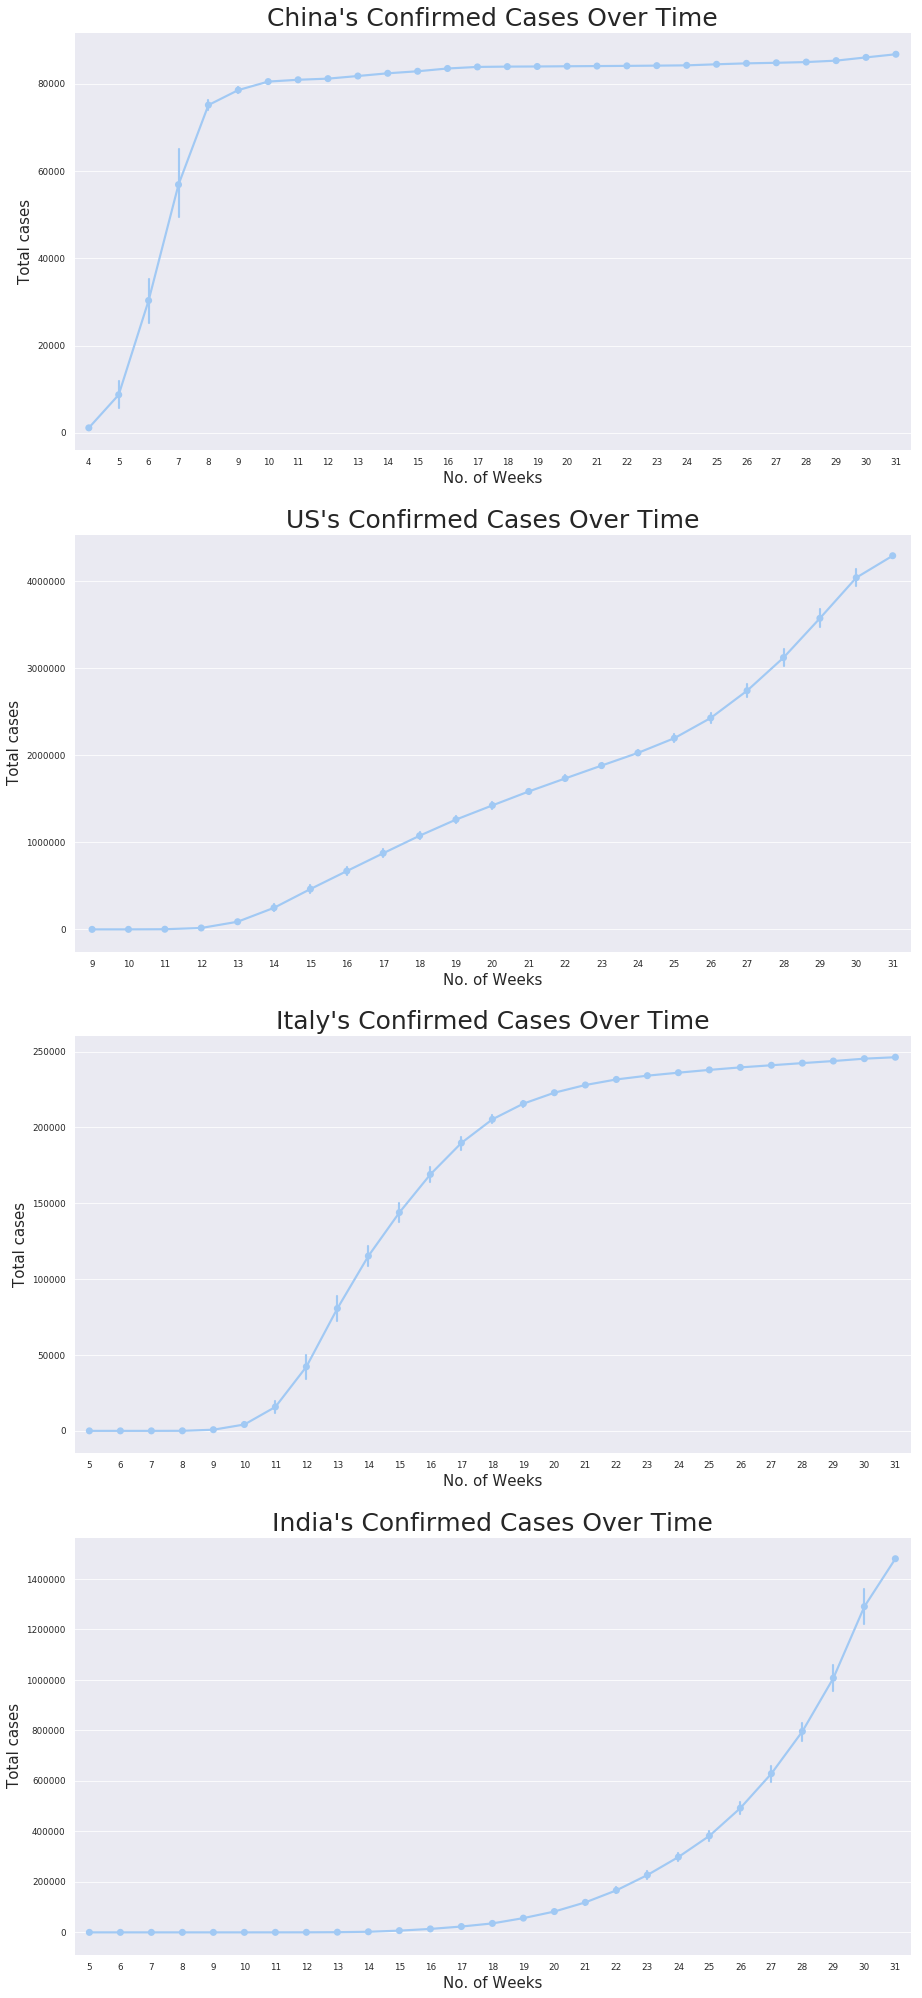

In [ ]:
plt.figure(figsize=(15,30))
a = plt.subplot(4, 1, 1)
sns.pointplot(china.date.dt.week ,china.confirmed)
plt.title("China's Confirmed Cases Over Time" , fontsize = 25)
plt.ylabel('Total cases', fontsize = 15)
plt.xlabel('No. of Weeks', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.date.dt.week ,us.confirmed)
plt.title("US's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Weeks', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.date.dt.week ,italy.confirmed)
plt.title("Italy's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Weeks', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.date.dt.week ,india.confirmed)
plt.title("India's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Weeks', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

## B. Comparision on no. of active cases now:

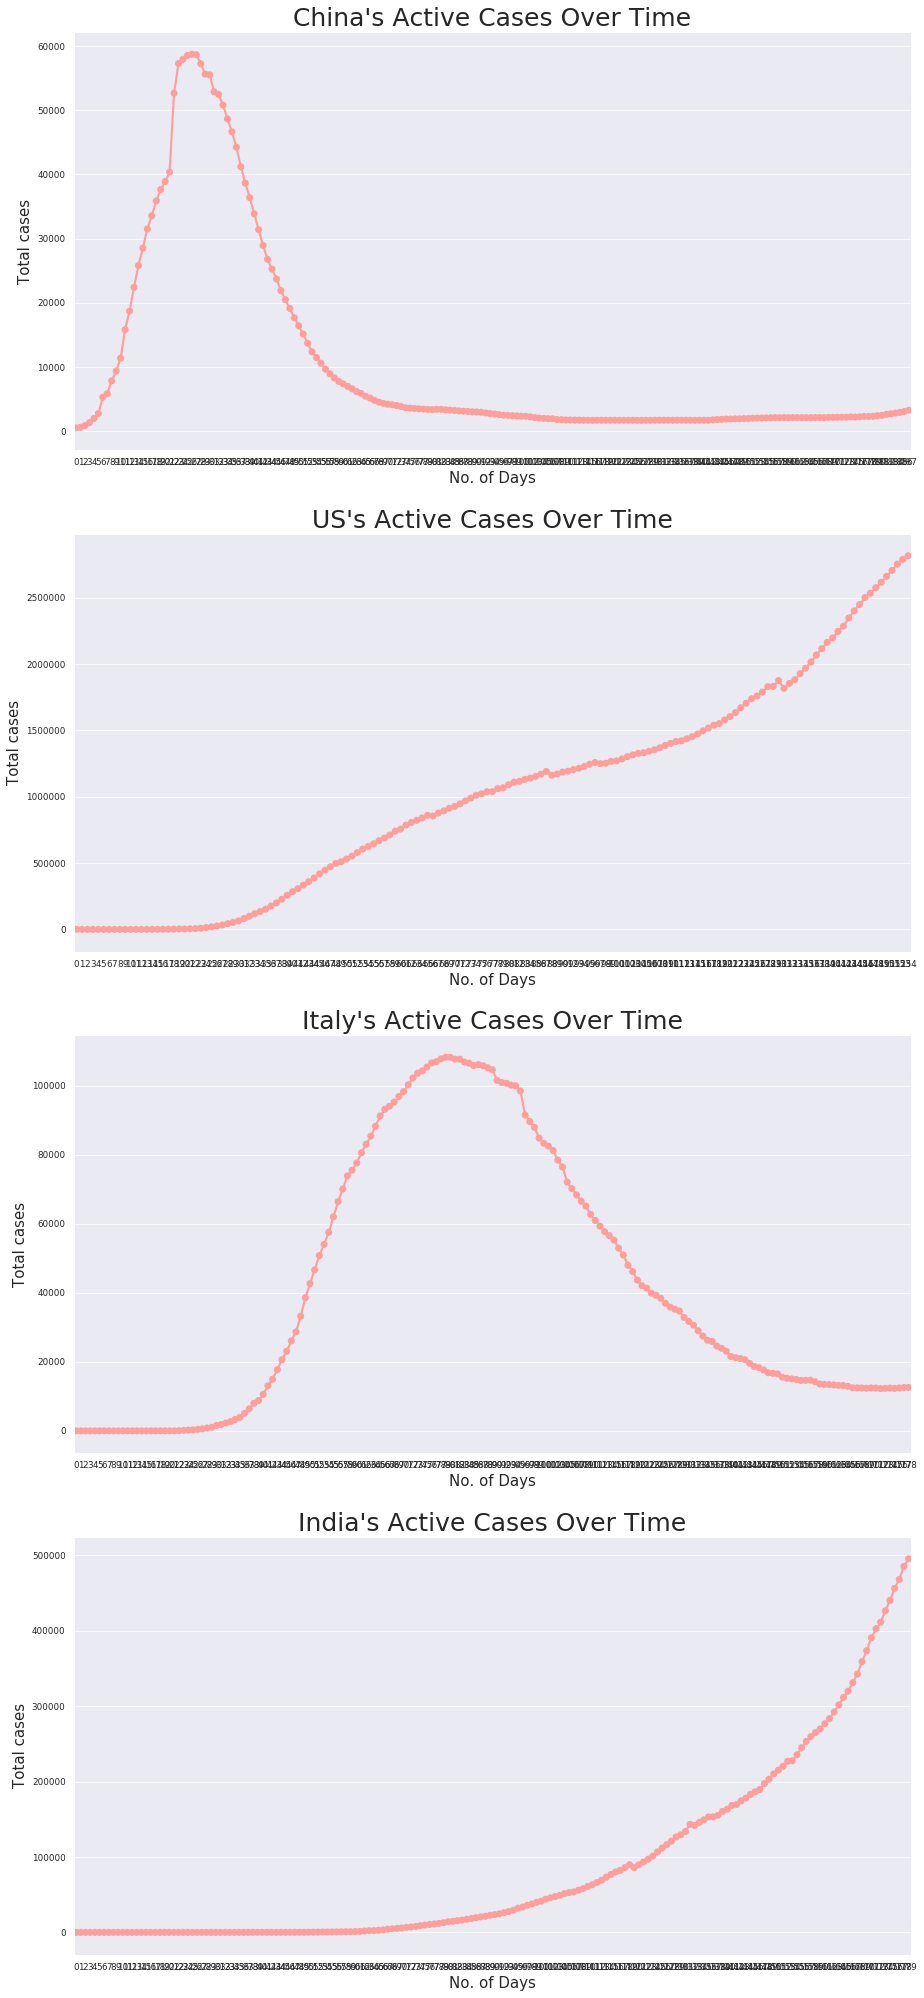

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.active, color = 'r')
plt.title("China's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.active, color = 'r')
plt.title("US's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.active, color = 'r')
plt.title("Italy's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.active, color = 'r')
plt.title("India's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

## C. Comparision on no. of death cases till date:

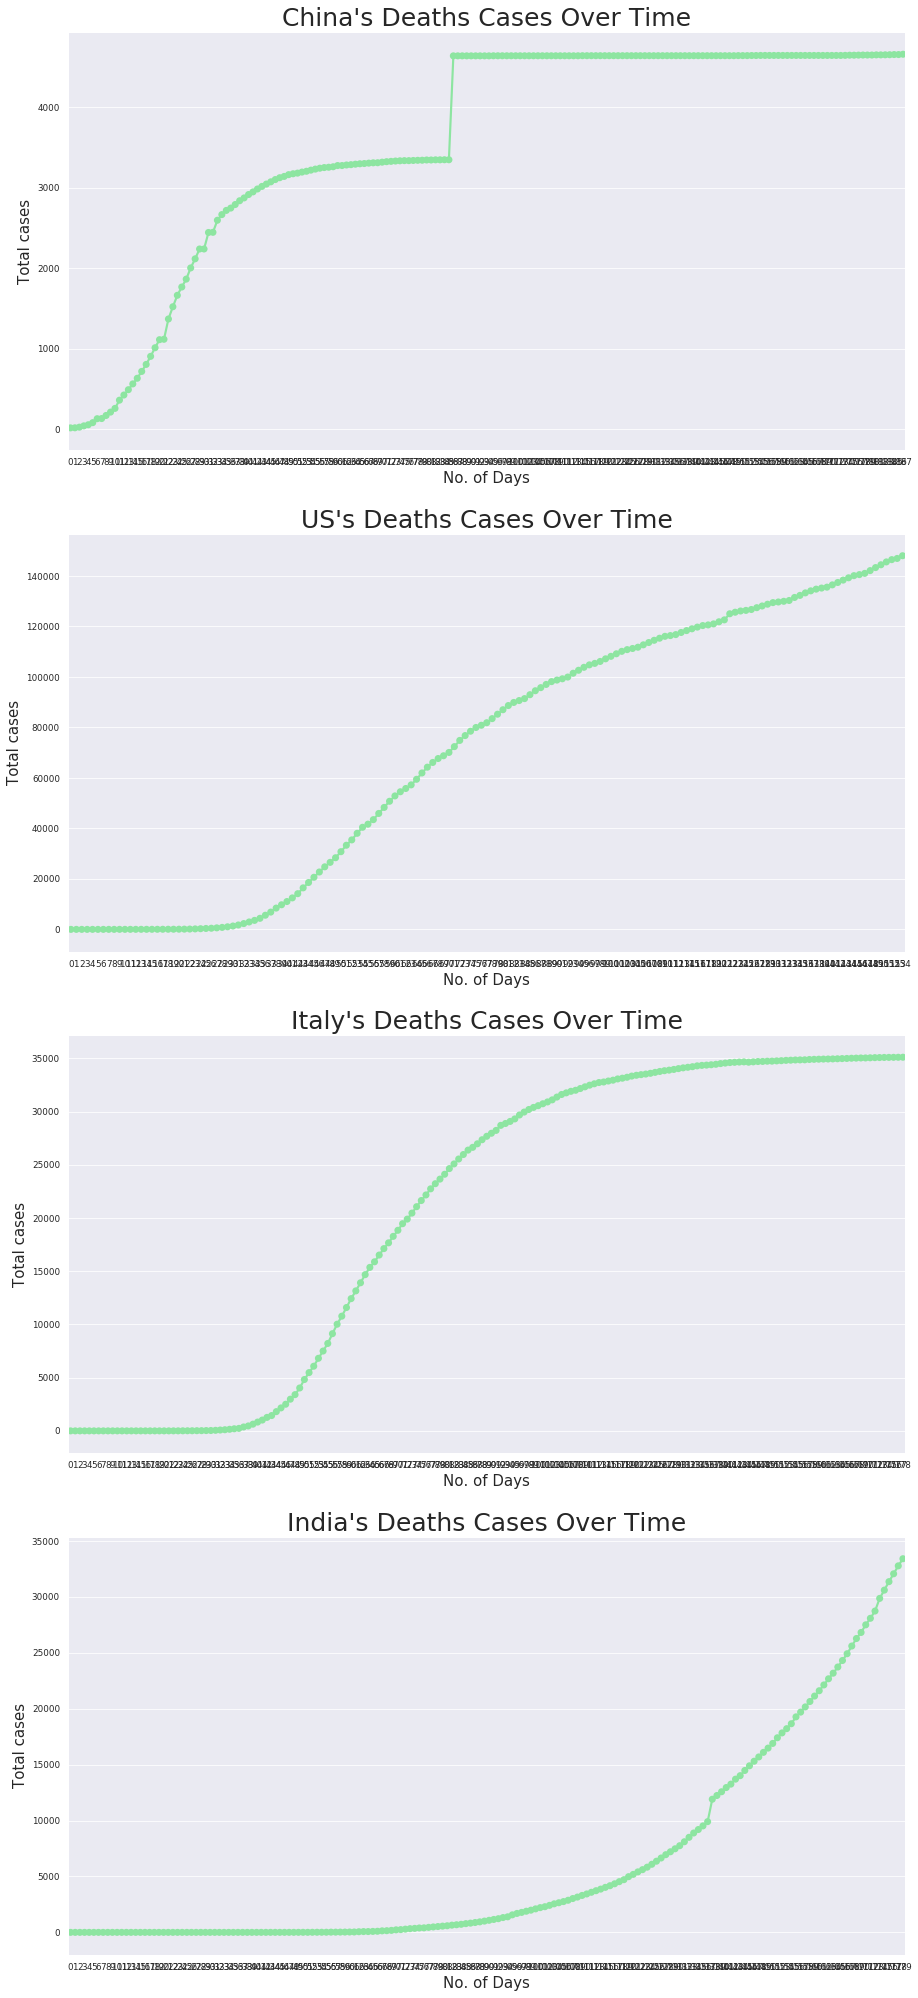

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.deaths, color = 'g')
plt.title("China's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.deaths, color = 'g')
plt.title("US's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.deaths, color = 'g')
plt.title("Italy's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)


plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.deaths, color = 'g')
plt.title("India's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

## D. Comparision on no. of recovered cases till date:

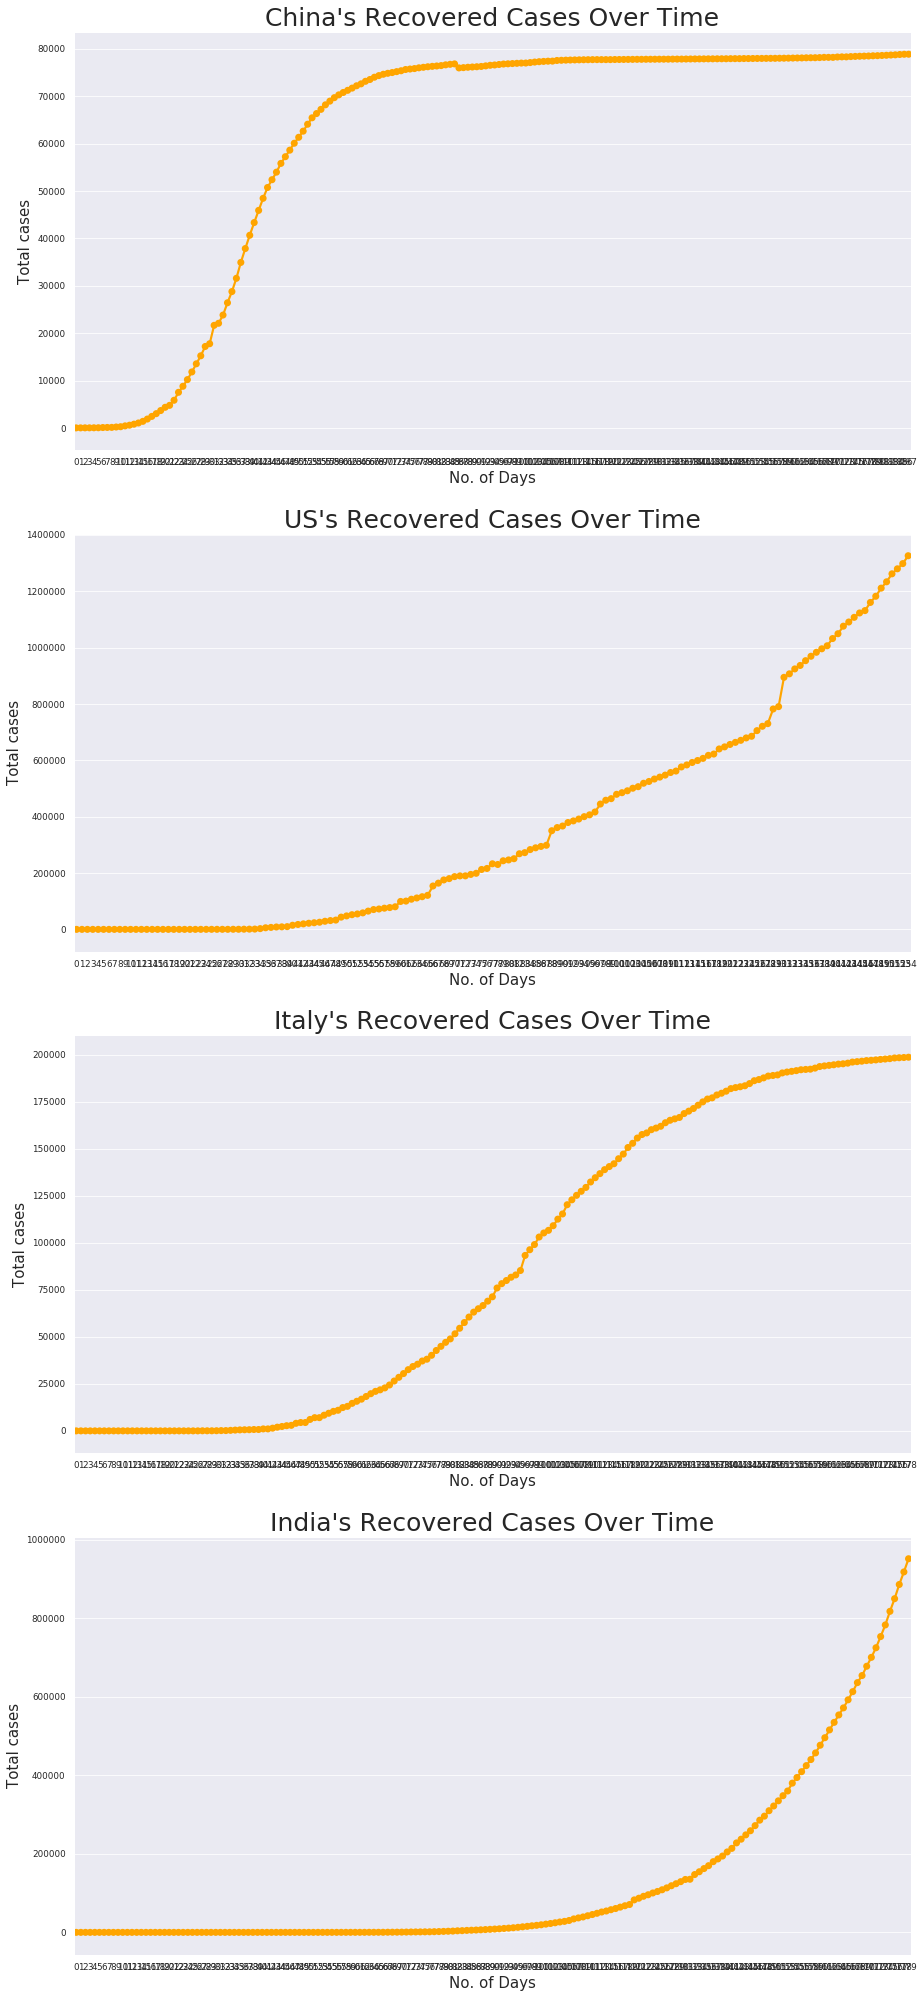

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.recovered, color = 'orange')
plt.title("China's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.recovered, color = 'orange')
plt.title("US's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.recovered, color = 'orange')
plt.title("Italy's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.recovered, color = 'orange')
plt.title("India's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)